# Explore here

In [33]:
# Your code here
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
#Aquí debo hacer mi EDA OJOOOO 
#Data frame a CSV
df.to_csv('bank-marketing-campaign-data.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [35]:
df = df.drop_duplicates().reset_index(drop=True)
# Ahora voy a quitar columnas que considero que no son necesarias
columnas_que_se_van = ['day_of_week', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'emp.var.rate','pdays','contact']
df.drop(columns=[col for col in columnas_que_se_van if col in df.columns], inplace=True)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41176 non-null  int64 
 1   job        41176 non-null  object
 2   marital    41176 non-null  object
 3   education  41176 non-null  object
 4   default    41176 non-null  object
 5   housing    41176 non-null  object
 6   loan       41176 non-null  object
 7   month      41176 non-null  object
 8   duration   41176 non-null  int64 
 9   campaign   41176 non-null  int64 
 10  previous   41176 non-null  int64 
 11  poutcome   41176 non-null  object
 12  y          41176 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.1+ MB


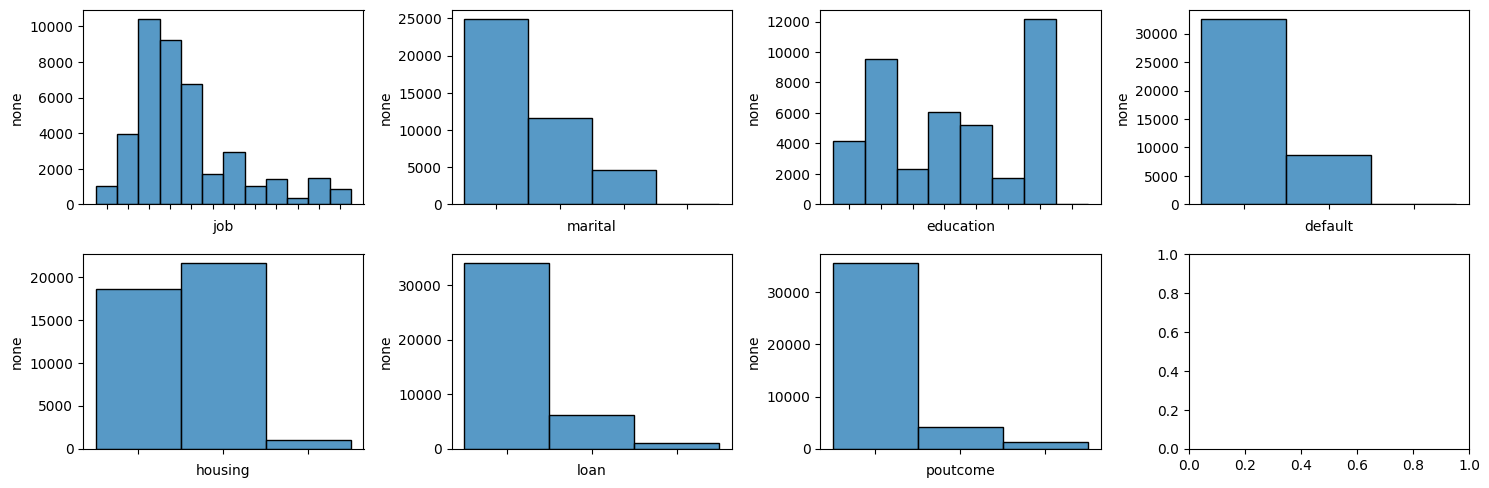

In [37]:
#Análisis univariante
#Variables categóricas

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 4, figsize=(15, 5))


sns.histplot(df['job'], ax=axis[0, 0]).set(ylabel ='none',xticklabels=[])
sns.histplot(df['marital'], ax=axis[0, 1]).set(ylabel ='none',xticklabels=[])
sns.histplot(df['education'], ax=axis[0, 2]).set(ylabel ='none',xticklabels=[])
sns.histplot(df['default'], ax=axis[0, 3]).set(ylabel ='none',xticklabels=[])
sns.histplot(df['housing'], ax=axis[1, 0]).set(ylabel ='none',xticklabels=[])
sns.histplot(df['loan'], ax=axis[1, 1]).set(ylabel ='none',xticklabels=[])
sns.histplot(df['poutcome'], ax=axis[1, 2]).set(ylabel ='none',xticklabels=[])

plt.tight_layout()
plt.show()

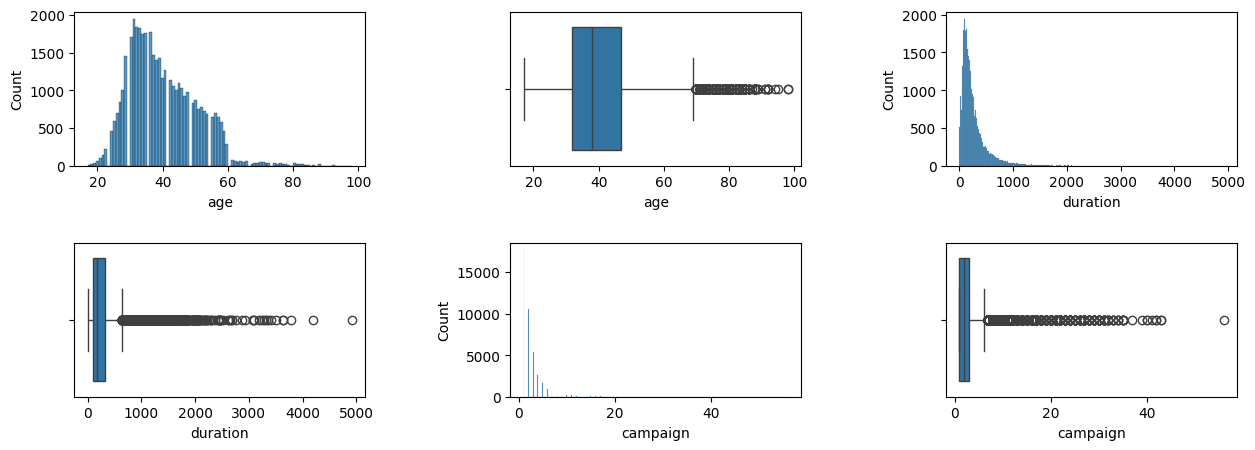

In [38]:
#ahora variables numéricas
fig, axis = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

sns.histplot(df['age'], ax=axis[0, 0])
sns.boxplot(x='age', data=df, ax=axis[0, 1])
sns.histplot(df['duration'], ax=axis[0, 2])
sns.boxplot(x='duration', data=df, ax=axis[1, 0])
sns.histplot(df['campaign'], ax=axis[1, 1])
sns.boxplot(x='campaign', data=df, ax=axis[1, 2])

plt.show()

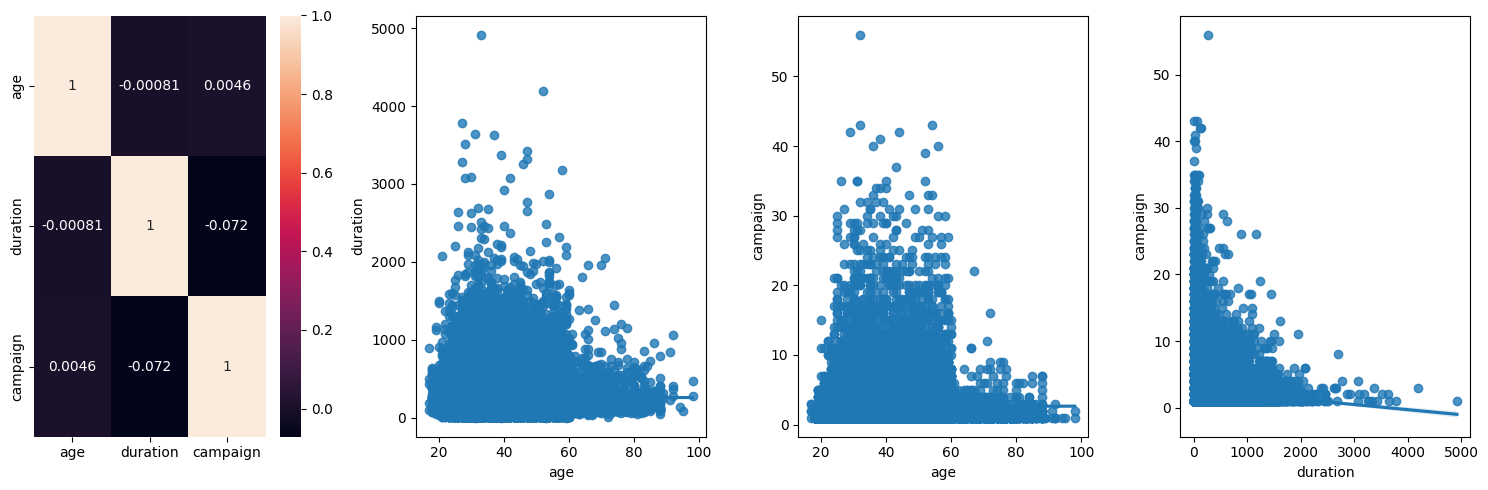

no hay correlación entre las variables numéricas


In [39]:
#Análisis multivariable
#variables numéricas

fig, axis = plt.subplots(1,4,figsize=(15,5))

sns.heatmap(df[['age', 'duration', 'campaign']].corr(), annot=True, ax=axis[0])
sns.regplot(x='age', y='duration', data=df, ax=axis[1])
sns.regplot(x='age', y='campaign', data=df, ax=axis[2])
sns.regplot(x='duration', y='campaign', data=df)

plt.tight_layout()
plt.show()

print("no hay correlación entre las variables numéricas")


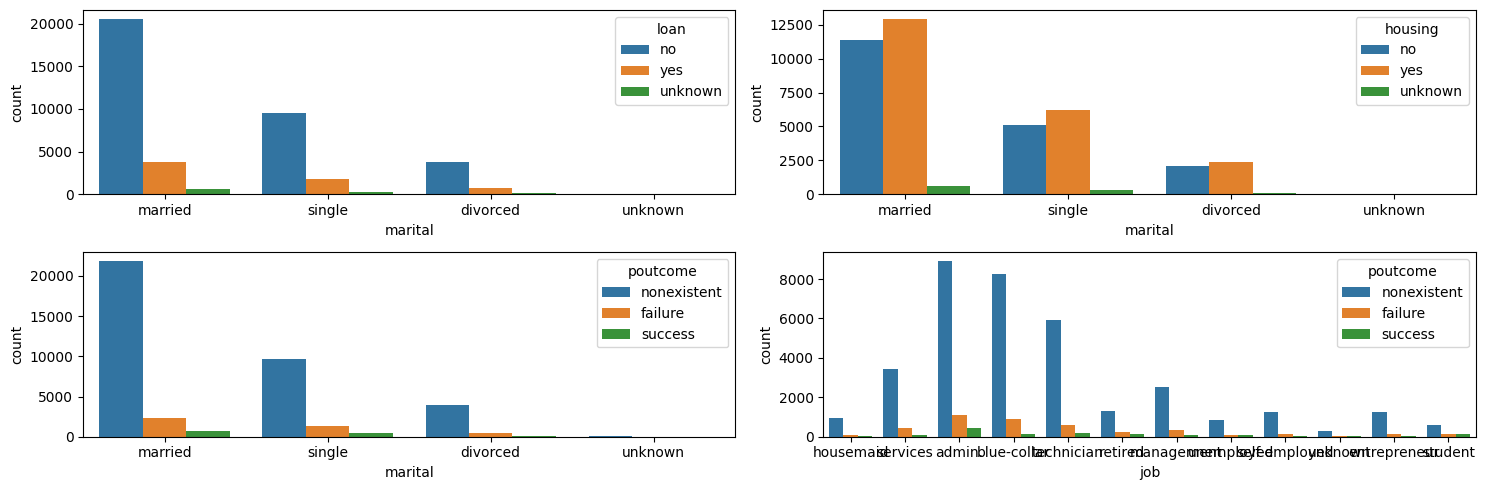

In [40]:
#Análisis categórico categórico

fig, axis = plt.subplots(2, 2, figsize=(15, 5))
#Quiero ver si el estado civil incide en que tenga préstamo o no
sns.countplot(x='marital', hue='loan', data=df, ax=axis[0, 0])  
#Se evidencia que los casados tienen más préstamos, ahora quiero ver préstamos de vivienda
sns.countplot(x='marital', hue='housing', data=df, ax=axis[0, 1])
#Se evidencia que los casados buscan tener casa. 
#ahora quiero ver el resultado anterior de la campaña
sns.countplot(x='marital', hue='poutcome', data=df, ax=axis[1, 0])
#Se evidencia q la gente casada se preocupa más por hacer un depósito a largo plazo
#ahora quiero ver si el trabajo influye en el resultado de la campaña
sns.countplot(x='job', hue='poutcome', data=df, ax=axis[1, 1])
#La gente administrativa es la que más depósitos a largo plazo hace


plt.tight_layout()
plt.show()

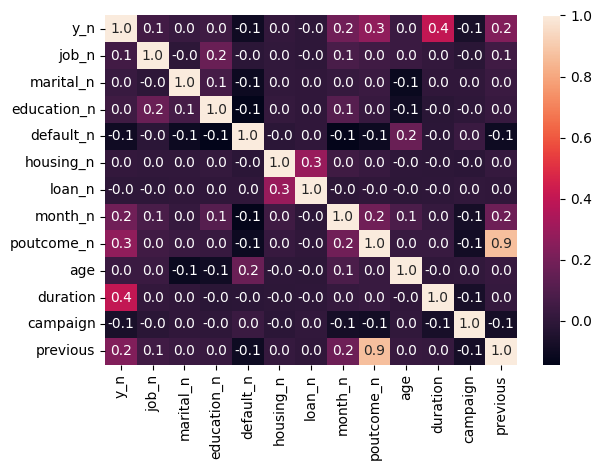

Se evidencia que la duración de la llamada es la variable que más incide en que la persona haga un depósito a largo plazo


In [41]:
#Ahora análisis numérico categórico
#Hay columnas categoricas entonces debo volverlas numéricas todas
df['job_n'] = pd.factorize(df['job'])[0]
df['marital_n'] = pd.factorize(df['marital'])[0]
df['education_n'] = pd.factorize(df['education'])[0]
df['default_n'] = pd.factorize(df['default'])[0]
df['housing_n'] = pd.factorize(df['housing'])[0]
df['loan_n'] = pd.factorize(df['loan'])[0]
df['month_n'] = pd.factorize(df['month'])[0]
df['poutcome_n'] = pd.factorize(df['poutcome'])[0]
df['y_n'] = pd.factorize(df['y'])[0]
#para hacerlo más fácil
#for column in df.columns:
#    if df[column].dtype == 'object':
#        df[column+'_n'] = pd.factorize(df[column])[0]

sns.heatmap(df[['y_n', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'month_n', 'poutcome_n', 'age', 'duration', 'campaign', 'previous']].corr(), annot=True, fmt= '.1f')
plt.tight_layout()
plt.show()


print("Se evidencia que la duración de la llamada es la variable que más incide en que la persona haga un depósito a largo plazo")

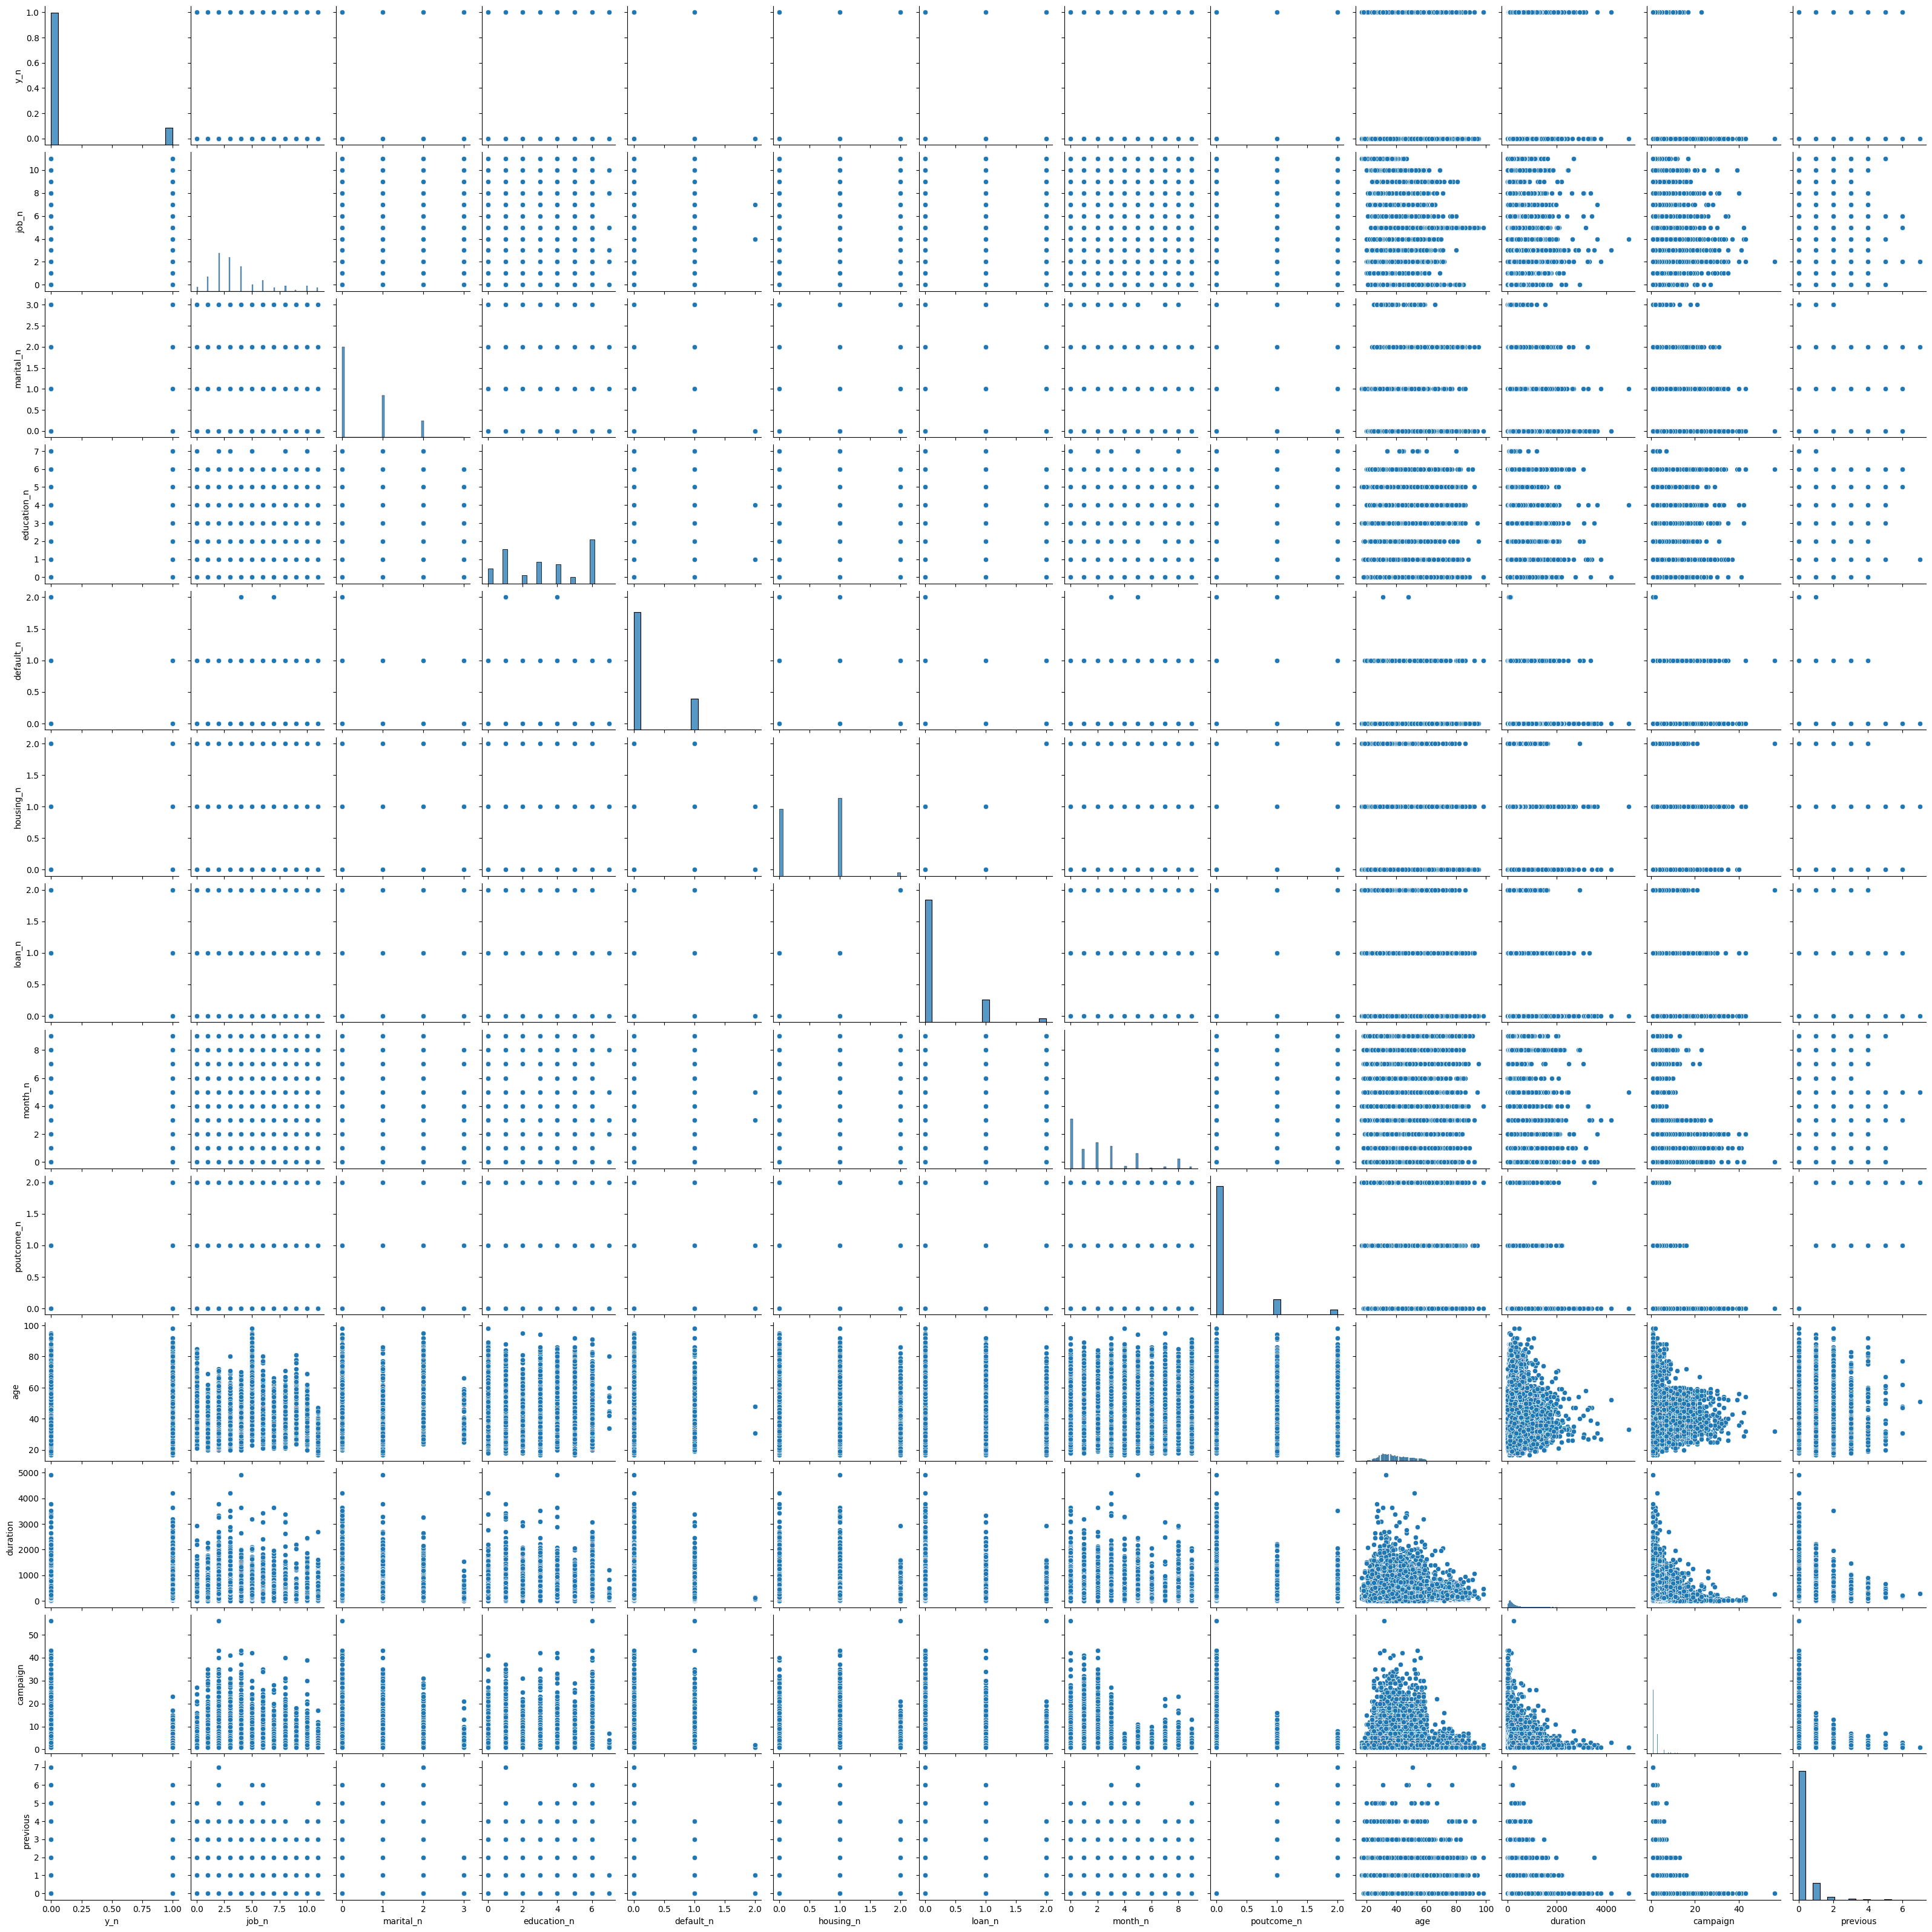

In [42]:
sns.pairplot(df[['y_n', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'month_n', 'poutcome_n', 'age', 'duration', 'campaign', 'previous']])
plt.show()

In [43]:
#ahora ingeniería de features

df.describe()

,age,duration,campaign,previous,job_n,marital_n,education_n,default_n,housing_n,loan_n,month_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.173013,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,2.249951,0.169953,0.112663
std,10.42068,259.305321,2.770318,0.494964,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,2.429157,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,9.000000,2.000000,1.000000


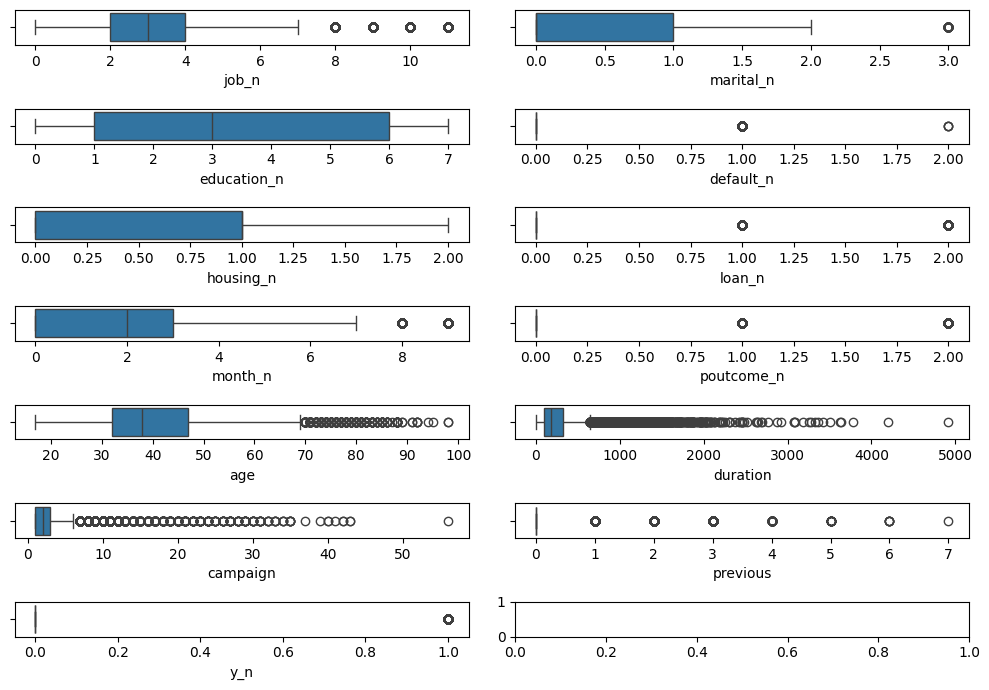

In [44]:
#listado para los boxplots
columnas = ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'month_n', 'poutcome_n', 'age', 'duration', 'campaign', 'previous','y_n']
fig, axis = plt.subplots(7, 2, figsize=(10, 7))

contador = 0
for i in range(7):
    for j in range(2):
        if contador < len(columnas):
            sns.boxplot(ax=axis[i,j], data=df, x=columnas[contador])
            contador += 1
        else:
            break
            
plt.tight_layout()
plt.show()



In [45]:
#Considero no sacar el atípico de mi variable Y, ya que es una variable binaria y no quiero perder información
#df.info()
df.describe()

,age,duration,campaign,previous,job_n,marital_n,education_n,default_n,housing_n,loan_n,month_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.173013,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,2.249951,0.169953,0.112663
std,10.42068,259.305321,2.770318,0.494964,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,2.429157,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,9.000000,2.000000,1.000000


In [46]:
#Ahora, veo que en los boxplot las variables age, duration y campaign tienen muchos atípicos, entonces voy a sacarlos
stats_age= df['age'].describe()
stats_duration= df['duration'].describe()
stats_campaign= df['campaign'].describe()

def limites_superior_inferior(stats_df):
    iqr= stats_df["75%"] - stats_df["25%"]
    upper_limit = stats_df["75%"] + 1.5 * iqr
    lower_limit = stats_df["25%"] - 1.5 * iqr
    return round(upper_limit), round(lower_limit)

limites_superior_inferior(stats_age)
print(f'los límites de age son {limites_superior_inferior(stats_age)}')
limites_superior_inferior(stats_duration)
print(f'los límites de duration son {limites_superior_inferior(stats_duration)}')
limites_superior_inferior(stats_campaign)
print(f'los límites de campaign son {limites_superior_inferior(stats_campaign)}')

los límites de age son (70, 10)
los límites de duration son (644, -224)
los límites de campaign son (6, -2)


In [47]:
#Voy a sacar a los menores de 18 años porque considero que no abrirían un depósito a largo plazo

df = df[(df['age'] >= 18) & (df['age'] <= 70)]
#Voy a dejar los duration mayores a 0 porque no tiene sentido un número negativo
df = df[(df['duration'] > 0)]
#lo mismo con campaign
df = df[(df['campaign'] > 0)]

df.shape
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
month          0
duration       0
campaign       0
previous       0
poutcome       0
y              0
job_n          0
marital_n      0
education_n    0
default_n      0
housing_n      0
loan_n         0
month_n        0
poutcome_n     0
y_n            0
dtype: int64

In [48]:
#Para ver qué variables son numéricas
variables_numericas = []
for column in df.columns:
    if df[column].dtype != 'object':
        variables_numericas.append(column)
variables_numericas

['age',
 'duration',
 'campaign',
 'previous',
 'job_n',
 'marital_n',
 'education_n',
 'default_n',
 'housing_n',
 'loan_n',
 'month_n',
 'poutcome_n',
 'y_n']

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
características_escaladas = scaler.fit_transform(df[variables_numericas])
df_escalado = pd.DataFrame(características_escaladas, columns=variables_numericas)
df_escalado.head()

,age,duration,campaign,previous,job_n,marital_n,education_n,default_n,housing_n,loan_n,month_n,poutcome_n,y_n
0,0.730769,0.052878,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,0.030100,0.0,0.0,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0
2,0.365385,0.045760,0.0,0.0,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0
3,0.423077,0.030506,0.0,0.0,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0
4,0.730769,0.062233,0.0,0.0,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0


In [50]:
from sklearn.model_selection import train_test_split
#Aquí saco la columna que voy a predecir
X = df_escalado.drop('y_n', axis=1)
#Aquí digo cuál es la columna que voy a predecir
Y = df_escalado['y_n']
#Aquí hago el split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,age,duration,campaign,previous,job_n,marital_n,education_n,default_n,housing_n,loan_n,month_n,poutcome_n
25807,0.326923,0.015457,0.018182,0.142857,0.272727,0.333333,0.142857,0.0,0.0,0.0,0.555556,0.5
361,0.750000,0.076876,0.018182,0.000000,0.545455,0.000000,0.857143,0.0,0.5,0.0,0.000000,0.0
8231,0.730769,0.191173,0.036364,0.000000,0.545455,0.000000,0.428571,0.0,0.5,0.0,0.111111,0.0
2633,0.269231,0.024609,0.109091,0.000000,0.272727,0.333333,0.428571,0.0,0.0,0.0,0.000000,0.0
18838,0.346154,0.029693,0.000000,0.000000,0.181818,0.000000,0.857143,0.0,0.0,0.0,0.333333,0.0


In [51]:
from sklearn.feature_selection import SelectKBest,chi2

selection_model = SelectKBest(score_func=chi2, k=8)
selection_model.fit(X_train, Y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])


In [52]:
from sklearn.linear_model import LogisticRegression


modelo = LogisticRegression()
modelo.fit(X_train_sel, Y_train)


LogisticRegression()

In [53]:
#Ahora predigo
Y_pred = modelo.predict(X_test_sel)
Y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(8150,))

In [54]:
#Ahora estoy viendo qué tan bueno es el modelo
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

#Y al parecer daba mejor resultado sin quitar las columnas que consideré que no eran necesarias

0.9011042944785276

In [55]:
#Ahora uso hiperparámetros
#Esto lo debería copiar y guardarlo jeje
from sklearn.model_selection import GridSearchCV

hyperparametros = {
     "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(modelo, hyperparametros, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [56]:
def warn (*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, Y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")


Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


In [57]:
best_model = grid.best_estimator_
Y_pred = best_model.predict(X_test_sel)
accuracy_score(Y_test, Y_pred)



0.9003680981595092

In [58]:
#Ahora voy a guardar mi modelo en un archivo pickle
from pickle import dump

dump(modelo, open('../models/Regresión_logística_default.sav', 'wb'))